# FEATURE SELECTION USING CORRELATION

If two features were highly correlated means (more than 90% or 85%) then either of one feature will be removed

Because if two variables were highly correlated then both the features will behave same according to the model.

So removing one of the feature will reduce curse of dimensionality

In [124]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
d=load_boston()
df1=pd.DataFrame(d.data,columns=d.feature_names)
df1["MEDV"] = d.target
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset is imported from sklearn and it is converted into dataframe

In [126]:
X=df1.drop('MEDV',axis=1)

In [127]:
Y=df1['MEDV']

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape

(404, 13)

In [129]:
X_test.shape

(102, 13)

Train test split is done.....

The correlation check should only be done in training data.

So if any 2 features seem to be highly correlated then either of the feature will be removed in order to reduce curse of dimensionality.

## PEARSON METHOD

In [130]:
X_train.corr(method="pearson")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.203052,0.394004,-0.059438,0.437684,-0.196545,0.340676,-0.372582,0.625828,0.578899,0.280752,-0.331379,0.464403
ZN,-0.203052,1.000000,-0.534523,-0.024872,-0.527536,0.348199,-0.585812,0.656658,-0.313497,-0.329665,-0.396806,0.171123,-0.428584
INDUS,0.394004,-0.534523,1.000000,0.019945,0.757107,-0.405883,0.635978,-0.699502,0.573361,0.720073,0.390679,-0.342290,0.606026
CHAS,-0.059438,-0.024872,0.019945,1.000000,0.032281,0.107340,0.048548,-0.071933,-0.010475,-0.048810,-0.107799,0.079502,-0.061047
NOX,0.437684,-0.527536,0.757107,0.032281,1.000000,-0.304220,0.743162,-0.774841,0.635081,0.693064,0.199779,-0.384622,0.596475
RM,-0.196545,0.348199,-0.405883,0.107340,-0.304220,1.000000,-0.261999,0.204028,-0.197837,-0.290858,-0.379197,0.140592,-0.620118
AGE,0.340676,-0.585812,0.635978,0.048548,0.743162,-0.261999,1.000000,-0.754547,0.444137,0.504211,0.244094,-0.253652,0.612759
DIS,-0.372582,0.656658,-0.699502,-0.071933,-0.774841,0.204028,-0.754547,1.000000,-0.479621,-0.536082,-0.203303,0.268693,-0.503193
RAD,0.625828,-0.313497,0.573361,-0.010475,0.635081,-0.197837,0.444137,-0.479621,1.000000,0.904438,0.447445,-0.446020,0.480207
TAX,0.578899,-0.329665,0.720073,-0.048810,0.693064,-0.290858,0.504211,-0.536082,0.904438,1.000000,0.453687,-0.436716,0.543012


<AxesSubplot:>

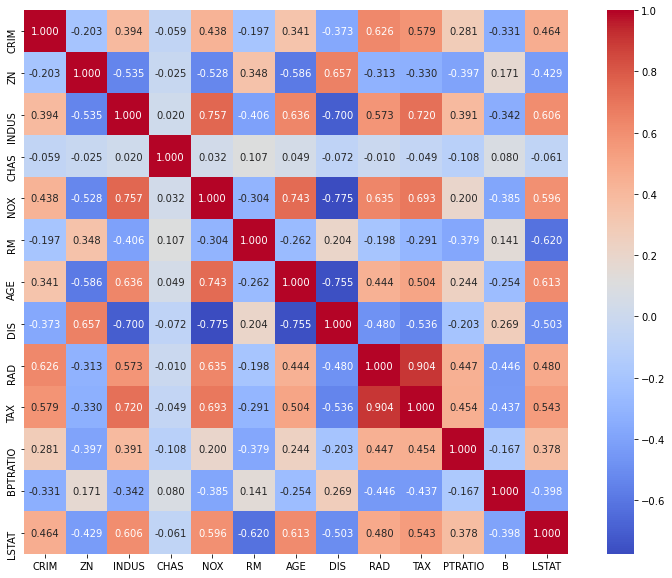

In [131]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train.corr(method="pearson"),annot=True,square= True,fmt='.3f',cmap= 'coolwarm')

In [132]:
def cor(d,threshold):
    col_corr=set()
    cmatrix=d.corr(method="pearson")
    for i in range(len(d.columns)):
        for j in range(i):
            if(cmatrix.iloc[i,j]>threshold):
                col=cmatrix.columns[i]
                col_corr.add(col)
    return col_corr          

The above function will check each column in the training set, and it will compare all possible combinations.....it means every possible combination of checking correlation between 2 features is done.

If the correlation value of any combination of 2 features is greater than threshold value then from that 2 features either any of the feature name will be added to the set named col_corr.

The process will continue till the loop ends.

Finally col_corr returns the whole set of the features.

In [133]:
c=cor(X_train,0.90)
c

{'TAX'}

Above statement is the function call where the threshold value is our choice mostly it will be above 0.90 because above 0.90 is considered as highly correlated

In some cases it will be above 0.85...but its all upto the use case and the analyst

In [134]:
X_train.drop(c,axis=1)
X_test.drop(c,axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,17.3,396.90,5.77
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,20.2,50.92,18.13
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,19.7,395.11,13.15
213,0.14052,0.0,10.59,0.0,0.489,6.375,32.3,3.9454,4.0,18.6,385.81,9.38


Above statements are the most important part.....

The features in the set col_corr should be removed from both training and testing set

## SPEARMAN METHOD

In [135]:
X_train.corr(method="spearman")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.587432,0.721907,0.023106,0.831306,-0.310381,0.710630,-0.734961,0.714735,0.740489,0.467077,-0.363426,0.646205
ZN,-0.587432,1.000000,-0.655569,-0.020014,-0.639541,0.393419,-0.559223,0.608855,-0.281055,-0.399622,-0.468791,0.159254,-0.513298
INDUS,0.721907,-0.655569,1.000000,0.048298,0.779603,-0.440570,0.672520,-0.745961,0.434121,0.676231,0.447101,-0.279690,0.641978
CHAS,0.023106,-0.020014,0.048298,1.000000,0.020019,0.077133,0.031931,-0.040530,0.022646,-0.058636,-0.132738,-0.006641,-0.067063
NOX,0.831306,-0.639541,0.779603,0.020019,1.000000,-0.313764,0.798755,-0.877698,0.595763,0.662705,0.395854,-0.288766,0.638728
RM,-0.310381,0.393419,-0.440570,0.077133,-0.313764,1.000000,-0.308599,0.269693,-0.117586,-0.292795,-0.328797,0.091872,-0.658139
AGE,0.710630,-0.559223,0.672520,0.031931,0.798755,-0.308599,1.000000,-0.798914,0.400988,0.528020,0.349351,-0.198464,0.671917
DIS,-0.734961,0.608855,-0.745961,-0.040530,-0.877698,0.269693,-0.798914,1.000000,-0.477592,-0.572982,-0.301922,0.219811,-0.572978
RAD,0.714735,-0.281055,0.434121,0.022646,0.595763,-0.117586,0.400988,-0.477592,1.000000,0.702774,0.298370,-0.256413,0.394464
TAX,0.740489,-0.399622,0.676231,-0.058636,0.662705,-0.292795,0.528020,-0.572982,0.702774,1.000000,0.463843,-0.300202,0.541381


<AxesSubplot:>

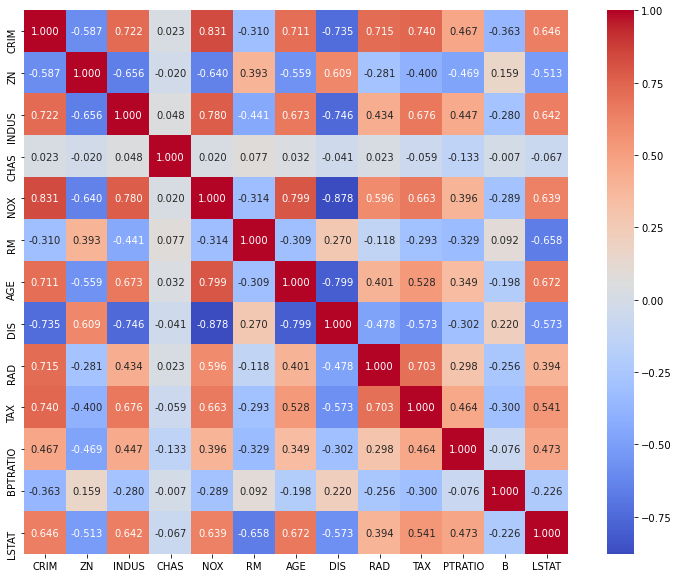

In [136]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train.corr(method="spearman"),annot=True,square= True,fmt='.3f',cmap= 'coolwarm')

In [137]:
def cor(d,threshold):
    col_corr=set()
    cmatrix=d.corr(method="spearman")
    for i in range(len(d.columns)):
        for j in range(i):
            if(cmatrix.iloc[i,j]>threshold):
                col=cmatrix.columns[i]
                col_corr.add(col)
    return col_corr          

In [138]:
d=cor(X_train,0.90)
d

set()

d is empty set because there is no value is greater than threshold.

So in pearson method TAX and RAD are highly correlated with the value of 0.904.

But in spearman method TAX and RAD has correlation value 0.703

So it seems like comparitively huge difference

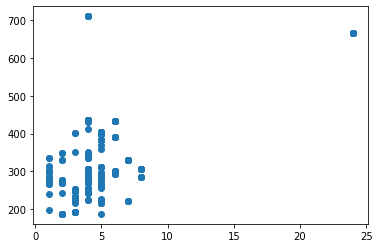

In [141]:
plt.scatter(X_train['RAD'],X_train['TAX'])

So this is the data plot between TAX and RAD...

It seems like data is linearly increasing between 0 and 10.

So pearson coefficient is higher than spearman.

If the data plot is monotonic then spearman coefficient will be higher




A doubt may come like the spearman is not restricted only to monotonic behaviour but why its showing a huge difference with pearson.

The answer could be(but not sure).....think of beneficial side of spearman....it works on rank variables so it works well with monotonic data...so it can give good value for monotonic data

whereas pearson coefficient values is calculated with real values of the dataset....so it can give good value for linear data....But pearson coeff is not meant for monotonic....

But spearman can also work with linear data but not as good as pearson method.